<a href="https://colab.research.google.com/github/ganeshap1995/Internsavy/blob/main/Internsavy_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

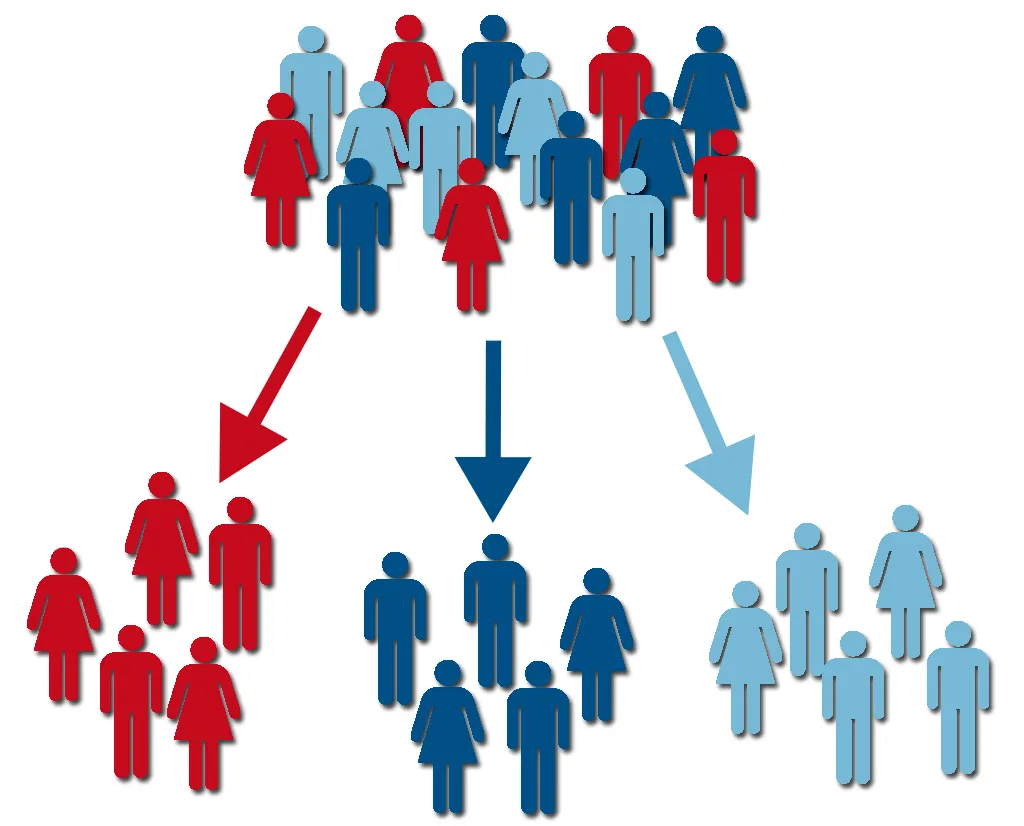

#**Project Name:** Customer Segmentation Analysis with Python
#**Author Name:** Ganesh Arjun Patewar
#**Dataset_link:**(https://www.kaggle.com/datasets/shwetabh123/mall-customers)
#**Project description:**
##For this project I am using Mall_customers csv file. In this data there are 200 rows and 5 columns. On basis of Age,Annual Income (k$) and Spending Score (1-100) we have to segementize the customers into optimal clusters.

###Importing libraries

In [46]:
from IPython.core.display import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

###Importing dataset

In [47]:
df=pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/Python All/csv/Mall_Customers.csv')

###Firstlook of data:

In [48]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


###Shape of data

In [49]:
df.shape

(200, 5)

###Information of data:

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


###Data decription:

In [51]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


###Checking and Handling Null and Duplicate Values

In [52]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There is no any null value.

In [53]:
df.duplicated().sum()

0

No duplicate is present in this dataset.

###Dropping column which is not required.

In [54]:
df.drop('CustomerID',axis=1,inplace=True)

###New look of data

In [55]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


###Dataframe with Columns of interest

In [56]:
new_df=df.iloc[:,1:]

In [57]:
new_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


#Plotting Dendrogram to understand optimum number of cluaters.

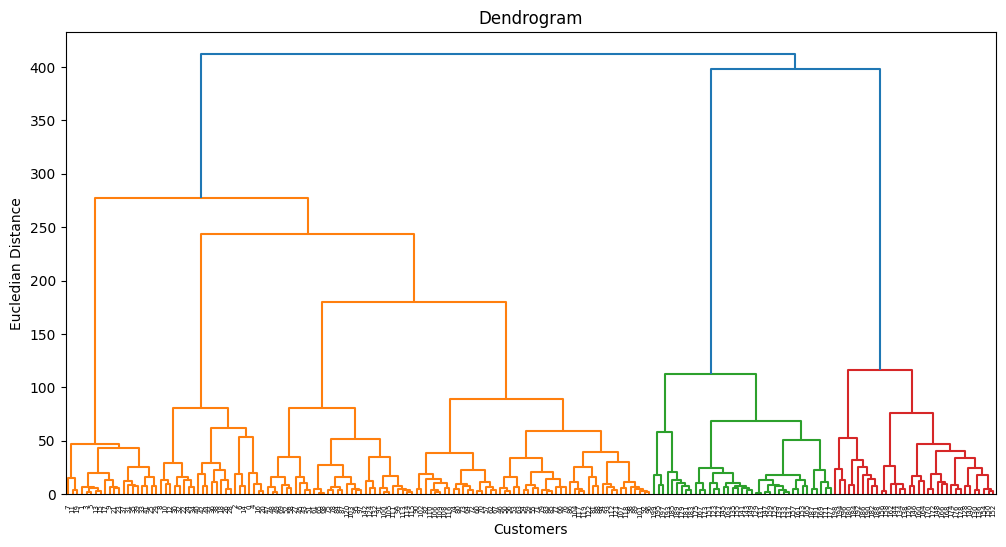

In [58]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12,6))

dendrogram=sch.dendrogram(sch.linkage(new_df,method='ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Eucledian Distance')

plt.show()

##How should we Choose the Number of Clusters in Hierarchical Clustering?

###A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.
###We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line).


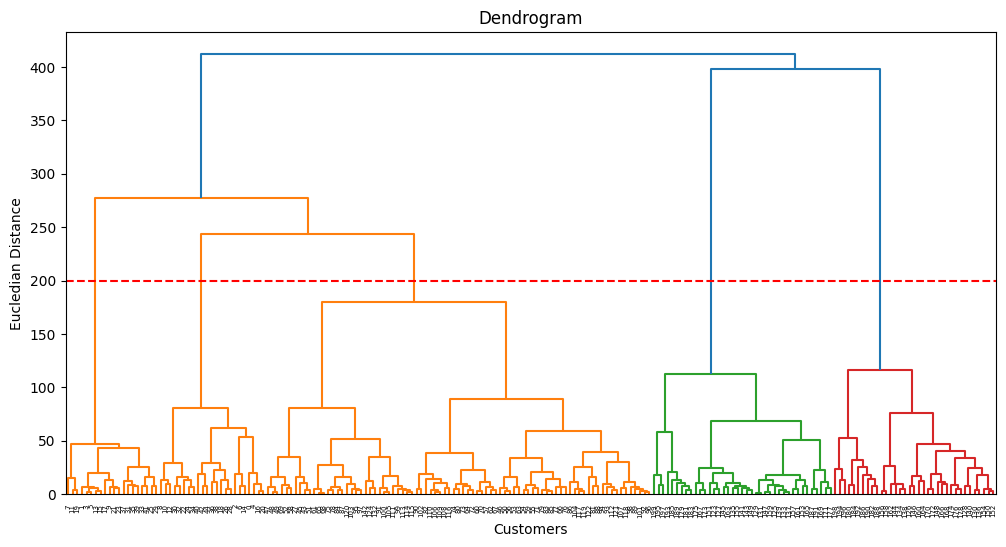

In [59]:
plt.figure(figsize=(12,6))

dendrogram=sch.dendrogram(sch.linkage(new_df,method='ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Eucledian Distance')
plt.axhline(y=200,color='red',linestyle='--')

plt.show()

##The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.
###No. of Cluster = 5

#Creating model and fitting data in model

In [60]:
from sklearn.cluster import AgglomerativeClustering

hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

y_hc= hc.fit_predict(new_df)

In [61]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

###Plotting 3D plot

Text(0.5, 0.92, 'Customer clusters using Hierarchical Clustering')

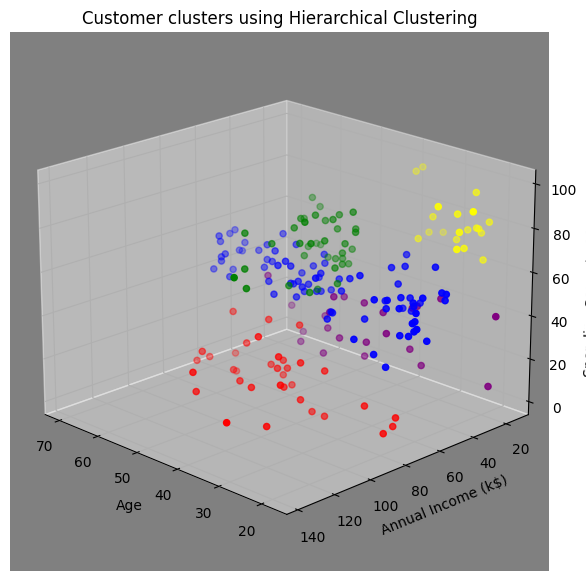

In [62]:
clusters= hc.fit_predict(new_df)
df['label'] = clusters

fig=plt.figure(figsize=(7,7))
ax=fig.add_subplot(111,projection='3d')

# Plotting different clusters
ax.scatter(df.Age[df.label==0],df['Annual Income (k$)'][df.label==0],df['Spending Score (1-100)'][df.label==0],c='blue',label='cluster1')
ax.scatter(df.Age[df.label==1],df['Annual Income (k$)'][df.label==1],df['Spending Score (1-100)'][df.label==1],c='red',label='cluster2')
ax.scatter(df.Age[df.label==2],df['Annual Income (k$)'][df.label==2],df['Spending Score (1-100)'][df.label==2],c='green',label='cluster3')
ax.scatter(df.Age[df.label==3],df['Annual Income (k$)'][df.label==3],df['Spending Score (1-100)'][df.label==3],c='yellow',label='cluster4')
ax.scatter(df.Age[df.label==4],df['Annual Income (k$)'][df.label==4],df['Spending Score (1-100)'][df.label==4],c='purple',label='cluster5')
ax.view_init(20,135)

# Set background color
ax.set_facecolor('gray')


# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Customer clusters using Hierarchical Clustering')


Now data is segmented into 5 different clusters.